# Pandas assignment
In this assignment, you will complete some functions what will be used in the transversal assignemnt.
You will implement some key functions in the ETL (Extract, Transform, Load) process used to prepare the data for the assignment.
 
First, you will define a function the data in the CSV file "datasets/Online Retail_2.csv" into a dataframe. The function must load only the columns:
- 'InvoiceNo': An invoice number 
- 'StockCode': The stock code of the product
- 'Description': A description of the product
- 'Quantity': Quantity in invoice
- 'InvoiceDate': Date of invoice 
- 'UnitPrice': Unitary price of product 
- 'CustomerID': Identifier of the customer 
- 'Country': Country of customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from IPython import display
path_to_csv = 'Online Retail_2.csv'

def read_file():
    """
    Reads the e-commerce dataset in Datasets/Online Retail.csv and loads it into a data frame.

    Args:
        None

    Returns: Pandas dataframe containing data
    """
    # Write your code here

    return pd.read_csv(path_to_csv, usecols=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])

ecommerce_data = read_file()
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Next, you will filter out rows that do not correspond to actual invoices, but returns or purchases. To do so, you will build a **query** that keeps only values where the column quantity is greater than zero.


In [2]:
def get_demand(ec):
    """
    Reads the quantity and returns indexes where the value is greater than 0

    Args:
        ec - A Pandas Dataframe containing e-commerce records.

    Returns: a dataframe with the production site identifier
    """
    # Write your code here
    return ec.query('Quantity > 0')

ecommerce_data = get_demand(ecommerce_data)
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Now, we are going to create a product code, just by keeping the first number of the stock code. 
You need to create a new column named 'product_type' with the first character of the column 'StockCode'.
You will then filter any stock code that does not start by a number using the str function **contains**.

In [3]:
def get_product_type(ec):
    """
    Reads the Stock Code and returns the first character of the string.
    This first character is used to identify the product type

    Args:
        ec - A Pandas Dataframe containing e-commerce records.

    Returns: a dataframe with the production site identifier
    """
    # Add a new column labeled 'Product type with the first character of the stock code
    ec['product_type'] = ec['StockCode'].str[0]

    # Filter values that do not start with a digit
    # Write your code here

    # 1st Option, was slower than doing a series.str.contains with regex.
    # return ec[pd.to_numeric(ec.product_type, errors='coerce').notnull()]
    return ec[ec['product_type'].str.contains(r'[0-9]', regex=True)]


ecommerce_data = get_product_type(ecommerce_data)
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID
count,528886.000000,528886.000000,396370.000000
mean,10.673415,3.258152,15301.602071
std,157.128259,4.375777,1709.982593
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.080000,15159.000000
75%,11.000000,4.130000,16803.000000
max,80995.000000,649.500000,18287.000000


Now that our data is ready, we will answer some questions.
First, add a new column named 'revenue' as the product of the quantity and the unit price.

In [4]:
ecommerce_data["Revenue"] = ecommerce_data["Quantity"] * ecommerce_data["UnitPrice"]
    # Write your code here
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,528886.000000,528886.000000,396370.000000,528886.000000
mean,10.673415,3.258152,15301.602071,19.420129
std,157.128259,4.375777,1709.982593,268.320619
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,13975.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,11.000000,4.130000,16803.000000,17.400000
max,80995.000000,649.500000,18287.000000,168469.600000


Now, answer the following questions using Pandas. 
What is the product type that generates the highest revenue?
Create a pivot table with index  'Country', column 'product' that shows the accumulated revenue per country and product type


In [18]:
# Write your code here
pd.pivot_table(ecommerce_data,index=["Country"], columns=["product_type"], values=["Revenue"], aggfunc=[np.sum], fill_value="0")

sum                                                  \
                      Revenue                                                   
product_type                1           2        3        4        5        6   
Country                                                                         
Australia              596.35   130955.77    311.4   2712.8        0        0   
Austria                593.76     7257.64   117.38   283.95        0        0   
Bahrain                     0      402.90     49.2        0        0        0   
Belgium                191.86    33618.66   195.27    373.3        0        0   
Brazil                  53.55     1069.65        0        0        0        0   
Canada                    127     1946.49   584.37    18.72        0        0   
Channel Islands          10.5    16685.95    40.56   932.55        0        0   
Cyprus                 462.27    10654.61   283.35     92.6     4.68        0   
Czech Republic              0      562.10        0    56.88        0        0   
Denmark                 96.06    16349.65   154.56    126.9     9.36        0   
EIRE                  2579.78   235630.56  2005.56  5109.53   129.24        0   
European Community          0      999.85        0        0        0        0   
Finland                220.05    10936.35   252.39   559.32        0        0   
France                 2474.6   166033.56   394.78  2725.77    39.12     11.7   
Germany               4551.53   180535.12     1839  3484.38    88.44     23.4   
Greece                   3.36     3452.26     34.8    690.6        0        0   
Hong Kong                5.88     8326.91       15    103.1        0        0   
Iceland                  16.8     3399.35        0     88.5     10.2        0   
Israel                 113.91     7609.20        0   152.55        0        0   
Italy                   73.08    13732.51   132.48   339.72   305.28        0   
Japan                    0.85    34315.67        0   1103.9        0        0   
Lebanon                     0     1368.68     12.6    69.75        0        0   
Lithuania               142.8     1439.06        0        0        0        0   
Malta                       0     1494.07    84.28        0        0        0   
Netherlands             86.36   262097.46  1181.28  1262.19        0        0   
Norway                 608.98    26482.17      282   344.14        0        0   
Poland                 254.05     5580.13   536.82     65.7        0        0   
Portugal               123.76    23564.54   640.44    375.6    10.35        0   
RSA                         0      862.56        0    68.25        0        0   
Saudi Arabia                0      145.92        0        0        0        0   
Singapore                   0     7937.39   107.28   390.48        0        0   
Spain                  205.81    39051.98   693.05   914.37    39.12     30.6   
Sweden                 603.06    32438.64     9.36    263.7   102.96        0   
Switzerland            393.37    45555.82   463.11  1459.83        0        0   
USA                      10.5     3137.36    87.43    91.15        0        0   
United Arab Emirates        0     1527.88        0     81.3        0        0   
United Kingdom         112025  6972819.48  55932.7   322200  5652.74  6049.26   
Unspecified             80.12     4088.53     3.15   168.09        0        0   

                                                     
                                                     
product_type                7            8        9  
Country                                              
Australia              279.02      3315.97        0  
Austria                 32.01       442.94       15  
Bahrain                282.24         19.8        0  
Belgium                196.81      2231.29   120.15  
Brazil                      0         20.4        0  
Canada                  39.66        399.2        0  
Channel Islands          20.4      2317.48        0  
Cyprus                 129.92

Now to find the product type with the highest accumulated revenue, we group the data frame by product type and perform a sum operation, we obtain a dataframe with the sum of the revenue.
With this data frame, we can make a bar plot to visually see the difference between product types revenues.

<AxesSubplot:xlabel='Product type', ylabel='Revenue'>

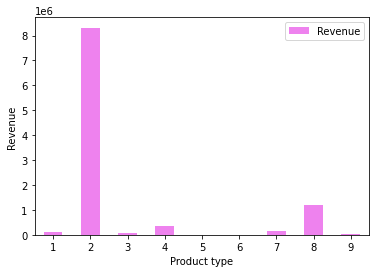

In [10]:
sum_revenue = ecommerce_data.groupby(by="product_type").sum()
sum_revenue.plot.bar(y = "Revenue", rot=0, xlabel = "Product type", ylabel = "Revenue", color=["violet"])

As we can see in the bar plot, the product type that generates the highest revenue is by far the product category 2.


